In [26]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

### 1. breast_cancer 데이터셋을 이용하여 딥러닝으로 처리하시요(sklearn, 케라스버전)
    1) train, test 분리
    2) test 1번째 행 암 여부 예측
    3) train, test 정확도 구하기

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 2. fashion_mnist 데이터셋을 이용하여 딥러닝으로 처리하시요
    (sklearn, 케라스버전)
    1) test 1번째 이미지 예측
    2) train, test 정확도 구하기
    3) confusion matrix(heat map) 을 통해 분류확인
    0 : T-shirt/top
    1 : Trouser
    2 : Pullover
    3 : Dress
    4 : Coat
    5 : Sandal
    6 : Shirt
    7 : Sneaker
    8 : Bag
    9 : Ankel boot

In [6]:
from tensorflow.keras.datasets.fashion_mnist import load_data

In [7]:
fashion = load_data()
fashion

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

#### train-test split

In [8]:
(x_train, y_train), (x_test, y_test) = fashion

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
y_train.shape

(60000,)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_test.shape

(10000,)

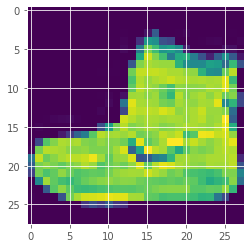

In [13]:
plt.imshow(x_train[0]) #면, 행, 열
plt.show()

In [14]:
y_train[0]

9

In [15]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### keras ver.

In [18]:
model = Sequential()
model.add( Flatten( input_shape=(28, 28) ) ) #3차원 -> 2차원
model.add( Dense( units=64, activation='relu' ) ) #vanishing gradient 방지
model.add( Dense( units=32, activation='relu' ) )
model.add( Dense( units=10, activation='softmax' ) )
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['acc']) #원핫 안해도 됨
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 783us/step - loss: 2.0893 - acc: 0.3605
Epoch 2/10
1875/1875 [==============================] - 1s 756us/step - loss: 1.1301 - acc: 0.5364
Epoch 3/10
1875/1875 [==============================] - 1s 763us/step - loss: 0.9382 - acc: 0.6054
Epoch 4/10
1875/1875 [==============================] - 1s 761us/step - loss: 0.7960 - acc: 0.6954
Epoch 5/10
1875/1875 [==============================] - 1s 747us/step - loss: 0.6363 - acc: 0.7664
Epoch 6/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.5967 - acc: 0.7887
Epoch 7/10
1875/1875 [==============================] - 1s 770us/step - loss: 0.5621 - acc: 0.7998
Epoch 8/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.5462 - acc: 0.8027
Epoch 9/10
1875/1875 [==============================] - 1s 724us/step - loss: 0.5269 - acc: 0.8105
Epoch 10/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.5224 - acc: 0.8118


In [19]:
x_test[0].shape

(28, 28)

#### 첫번째 이미지 예측

In [24]:
pred = model.predict(x_test[0].reshape(1, 28, 28)).argmax(axis=1)
pred

array([9], dtype=int64)

In [21]:
model.predict(x_test).argmax(axis=1)

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

#### accuracy

In [22]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 633us/step - loss: 0.5707 - acc: 0.8131


[0.5707499980926514, 0.8130999803543091]

#### confusion matrix & heatmap

In [23]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion = confusion_matrix(y_test, pred)
confusion

ValueError: Found input variables with inconsistent numbers of samples: [10000, 1]

In [ ]:
sns.heatmap( confusion, annot=True, fmt='d', linewidths=0.2, cmap='Blues') #annot -> 상관계수값/ fmt -> 데이터 타입
plt.show()

### sklearn ver.

In [33]:
x_train.shape

(60000, 28, 28)

In [34]:
y_train.shape

(60000,)

In [37]:
x_test.shape

(10000, 28, 28)

In [38]:
y_test.shape

(10000,)

In [39]:
x_train.reshape(-1, 28*28)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
model_mlp = MLPClassifier(hidden_layer_sizes=(64,32), max_iter=1000, verbose=True)
model_mlp.fit(x_train, y_train)      #2(특성데이터)  1(라벨)
                                    #2x100, 100x50, 50x1
                        #4x2  2x100 = 4x100  100x50  = 4x50  50x1  = 4x1

ValueError: Found array with dim 3. Estimator expected <= 2.